In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene
import scipy.stats as stats


In [2]:
df = pd.read_csv('WA_Marketing-Campaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
df.shape

(548, 7)

In [62]:
df_age_groupby = df.groupby(['AgeOfStore'])['SalesInThousands'].sum().sort_values(ascending = False).reset_index()
df_age_groupby

,AgeOfStore,SalesInThousands
0,1,4673.25
1,4,2351.26
2,5,2148.02
3,7,2085.15
4,8,2019.03
5,3,1927.28
6,6,1849.20
7,9,1371.89
8,19,1272.76
9,13,1192.85


/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_50806/2372680512.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="AgeOfStore", y="SalesInThousands", data=df_age_groupby, palette="Blues", ci=None)
/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_50806/2372680512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeOfStore", y="SalesInThousands", data=df_age_groupby, palette="Blues", ci=None)


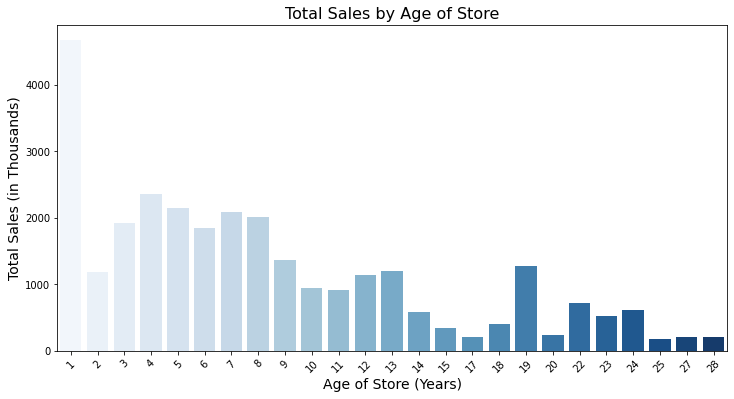

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x="AgeOfStore", y="SalesInThousands", data=df_age_groupby, palette="Blues", ci=None)

# Customizing the plot
plt.title("Total Sales by Age of Store", fontsize=16)
plt.xlabel("Age of Store (Years)", fontsize=14)
plt.ylabel("Total Sales (in Thousands)", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the graph
plt.show()

**From the graph above, most of the stores 9 years and younger tends to perform better in sales than the one . There's an obvious outlier to the right for stores that are 1 year old, they tend to generate a lot of sales.** 

In [70]:
df_age_groupby_market = df.groupby(['AgeOfStore', 'MarketSize'])['SalesInThousands'].sum().reset_index()

# Corrected Sorting
df_age_groupby_market = df_age_groupby_market.sort_values(by='AgeOfStore', ascending=False)

df_age_groupby_market

,AgeOfStore,MarketSize,SalesInThousands
51,28,Small,209.14
50,27,Medium,209.57
49,25,Medium,181.70
48,24,Medium,371.73
47,24,Large,241.96
46,23,Medium,211.98
45,23,Large,308.80
44,22,Small,519.76
43,22,Medium,196.50
42,20,Medium,240.81


In [83]:
df_age_market = df_age_groupby_market.groupby('MarketSize')['AgeOfStore'].mean().reset_index()

df_age_market = round(df_age_market.sort_values(by='AgeOfStore', ascending = True), 2)

df_age_market

,MarketSize,AgeOfStore
0,Large,10.06
2,Small,10.64
1,Medium,13.12


- On average Large market tends to have younger at 10.6 year old, suggesting that newer stores tend to be in larger market.


- Small markets are a little bit older than large market but still relatively young. Suggesting that small markets still receive new stores but not as frequent as large market.


- Medium market have the oldest stores 13.12, suggesting that the market might be saturated and not as profitable for new store opening.

In [78]:
df_age_market.dtypes

AgeOfStore            int64
MarketSize           object
SalesInThousands    float64
dtype: object

/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_50806/522832729.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeOfStore', y='SalesInThousands', hue='MarketSize', data=df_age_groupby_market,


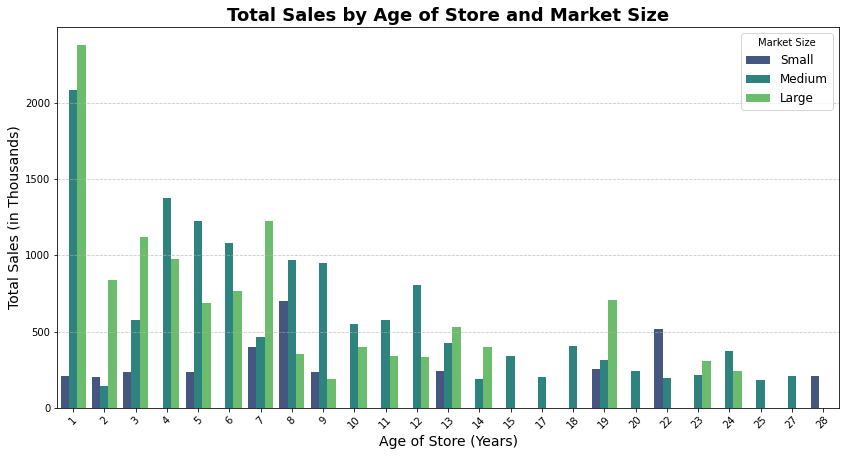

In [75]:
plt.figure(figsize=(14, 7))

# Bar plot with improved aesthetics
sns.barplot(x='AgeOfStore', y='SalesInThousands', hue='MarketSize', data=df_age_groupby_market,
            palette="viridis", ci=None, dodge=True)

plt.title("Total Sales by Age of Store and Market Size", fontsize=18, fontweight="bold")
plt.xlabel("Age of Store (Years)", fontsize=14)
plt.ylabel("Total Sales (in Thousands)", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title="Market Size", fontsize=12, loc="upper right")

plt.show()


- **Younger stores in large and medium markets drive the highest revenue.**  
  - This suggests that **new store openings in these markets are highly profitable.**
  
- **Sales decline over time**, so strategies should be implemented to **revitalize older stores**, such as:
  - Promotions  
  - Renovations  
  - Rebranding  

- **Small market stores struggle the most**, so investments in such locations should be carefully evaluated.

- **Look into the anomalies in older stores with high sales** (e.g., 9, 12, 19, 22 years old) to determine what contributes to their success.

Would you like a deeper statistical breakdown or specific insights into trends? 🚀


**Continuous variable**: SalesInThousands
**Categorical variables**: Promotion & MarketSize

If sample size is above 30 variables it is a large sample size (**548**)

Test if the **SalesInThousands** is continuous 

/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_50806/2454009478.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['SalesInThousands'], kde=True, palette='Blues')


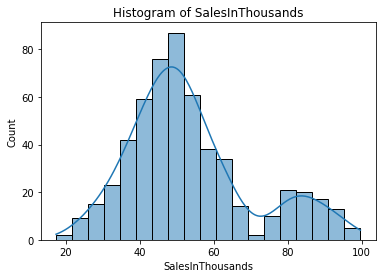

In [67]:
sns.histplot(df['SalesInThousands'], kde=True, palette='Blues')
plt.title("Histogram of SalesInThousands")
plt.show()

Due to the binomial distribution we bserved that there are two distinct peaks

In [6]:
# Shapiro test to check normality with T-stat and p-value

shapiro_results = {}

for promo in df['Promotion'].unique():
    group_data = df[df['Promotion'] == promo]['SalesInThousands']
    stat, p_value =  shapiro(group_data)
    shapiro_results[f'Promotion {promo}'] = (stat, p_value)

In [7]:
shapiro_results

{'Promotion 3': (0.9207685589790344, 1.499518376135711e-08),
 'Promotion 2': (0.9145088791847229, 5.456262108793908e-09),
 'Promotion 1': (0.9152998328208923, 1.977244323825289e-08)}

If Pvalue is less than 0.05 (Pvalue < 0.05) then the data is not normally distributed which is shown in all 3 promotions.

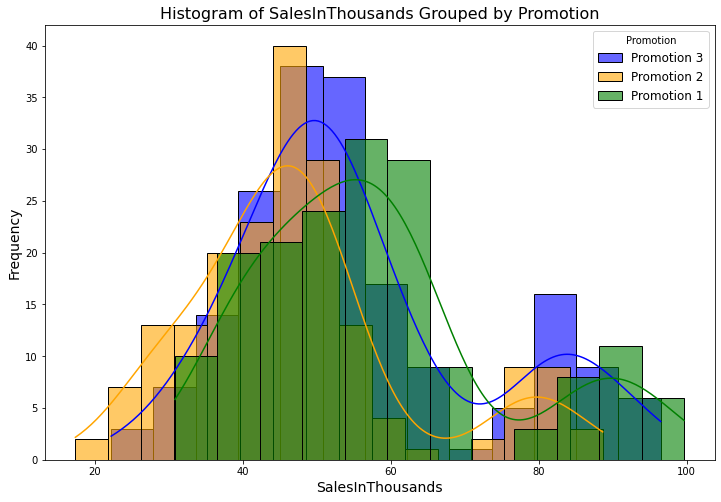

In [8]:
plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green']


for i, promo in enumerate(df['Promotion'].unique()):
    sns.histplot(df[df['Promotion'] == promo]['SalesInThousands'], kde=True, 
                 label=f'Promotion {promo}', alpha=0.6, color=colors[i])

    # Add titles and labels
plt.title('Histogram of SalesInThousands Grouped by Promotion', fontsize=16)
plt.xlabel('SalesInThousands', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title="Promotion", fontsize=12)
plt.show()

#### 1. Let's check the variance equality (Levene's Test)

> - Since normality has failed, knowing whether variances are equal will guide our next step.

> - If variances are equal, you may proceed with ANOVA (or Welch’s ANOVA if not).


In [9]:
# Perform Levene's Test for variance equality across promotion groups


levene_stat, levene_p = levene(
    df[df['Promotion'] == 1]['SalesInThousands'],
    df[df['Promotion'] == 2]['SalesInThousands'],
    df[df['Promotion'] == 3]['SalesInThousands']
)

levene_results = {
    "Levene's Statistic": levene_stat,
    "P-Value": levene_p
}

levene_results

{"Levene's Statistic": 1.2696787527507418, 'P-Value': 0.2817514565692118}

The Null Hypothesis H0:

> - The variances across the groups (Promotions 1, 2, and 3) are equal.

P-value interpretation:

> - p=0.282>0.05, we fail to reject the null hypothesis.
> - This means there is no significant difference in variances across the promotion groups.

**Conclusion:** If p value > 0.05 that means the variances are equal, that means in this case we will proceed with the two Anova test. 

- First we will need to address the normaility by transforming our data (SalesInThousands)

- If variances are equal, you may proceed with ANOVA (or Welch’s ANOVA if not).

- Decide on Transformation or Non-Parametric Tests:

> - If variance equality fails, move directly to Kruskal-Wallis.
> - If variance equality holds, consider transforming the data and proceeding with ANOVA.

### Two Way ANOVA 

1. Main Effects:

    > - Testing whether promotions affect sales:
    
          > - H0: Mean sales are the same across all promotions.
        
          > - HA: Mean sales differ for at least one promotion (no assumption about which is higher or lower).
        
    > - Testing whether market sizes affect sales:
    
          > - H0: Mean sales are the same across all market sizes.
        
          > - HA: Mean sales differ for at least one market size.
        
1. Interaction effect:

    > - Testing whether the effect of promotions depends on market size:
    
          > - H0: There is no interaction between promotion and market size.
        
          > - HA: There is an interaction (e.g., Promotion 1 might perform better in large markets but worse in small markets).

In [10]:
# Transform the data

df['LogSales'] = np.log(df['SalesInThousands'] + 1)  # Add 1 to avoid log(0)

Shapiro-Wilk Test: W=0.980830192565918, p=1.31114768464613e-06


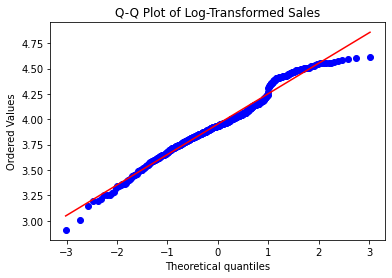

In [11]:
# Shapiro-Wilk test on transformed data
stat, p_value = shapiro(df['LogSales'])
print(f"Shapiro-Wilk Test: W={stat}, p={p_value}")

# Q-Q Plot
stats.probplot(df['LogSales'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log-Transformed Sales")
plt.show()

Since Pvalue < 0.05 then we can assume the data is not normally distributed.

In [12]:
# Let's try the boxcox transformation to normalize the data 

from scipy.stats import boxcox

# Apply Box-Cox transformation (add 1 to avoid issues with zeros)
df['BoxCoxSales'], fitted_lambda = boxcox(df['SalesInThousands'] + 1)
print(f"Fitted Lambda: {fitted_lambda}")

Fitted Lambda: -0.0013957254257198038


Shapiro-Wilk Test: W=0.9808399081230164, p=1.3190174286137335e-06


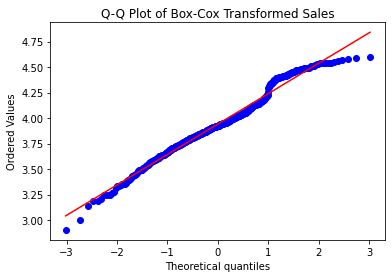

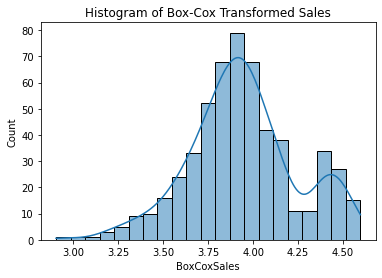

In [13]:
# Shapiro-Wilk test on Box-Cox transformed data
stat, p_value = shapiro(df['BoxCoxSales'])
print(f"Shapiro-Wilk Test: W={stat}, p={p_value}")

# Q-Q Plot
stats.probplot(df['BoxCoxSales'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Box-Cox Transformed Sales")
plt.show()

# Histogram
sns.histplot(df['BoxCoxSales'], kde=True)
plt.title("Histogram of Box-Cox Transformed Sales")
plt.show()

Due to the non normality of the data we will use a Non-Parametric test: **Kruskal-Wallis**

## Welch's ANOVA

### 1. Main Comparison

In [14]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [15]:
# Fit the model the C is used for categorical columns.
model = ols('SalesInThousands ~ C(Promotion)', data=df).fit()

# Perform Welch's ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

In [16]:
print("Welch's ANOVA Results:")
print(anova_results)

Welch's ANOVA Results:
                     sum_sq     df          F        PR(>F)
C(Promotion)   11449.174291    2.0  21.953486  6.765849e-10
Residual      142114.105414  545.0        NaN           NaN


In [17]:
anova_table = pd.DataFrame(anova_results)
anova_table

,sum_sq,df,F,PR(>F)
C(Promotion),11449.174291,2.0,21.953486,6.765849e-10
Residual,142114.105414,545.0,NaN,NaN


- **Sum of Squares** of **11449.17 / 142114.10**, This represents the variation in sales that can be explained by the differences between the promotion groups.

> -In our case, **11,449.17** indicates that the promotions have a measurable impact on sales.
> - However, this number alone doesn’t tell us the proportion of the total variability explained. For that, we calculate R^2 (effect size)

- **Degree of freedom** - the **1** It ensures that we only calculate meaningful variability between groups and that the F-statistic isn't inflated by unnecessary comparisons.

The "2 degrees of freedom" mean you have 2 comparisons to calculate:

> - Promotion 1 vs. Promotion 2.
> - Promotion 1 vs. Promotion 3 (or equivalently Promotion 2 vs. Promotion 3).

- The degrees of freedom between groups (df=2) allow you to check:

> - How much sales differ due to using Promotion 2 instead of Promotion 1.
> - How much sales differ due to using Promotion 3 instead of Promotion 1.

- A high **F-statistic** (like **21.95**) means that the variance between the promotion groups is much larger than the variance within each group. This suggests that promotion type has a strong impact on sales.

> - a high F-statistic suggests that sales differ substantially between at least some of the promotion groups.

- The **p-value** tells us whether the the promotions are significantly different or not.

> - Testing whether promotions affect sales:
    
            - H0: Mean sales are the same across all promotions.
        
            - HA: Mean sales differ for at least one promotion (no assumption about which is higher or lower).
            
**P.S. HA is TRUE**
            
            
> - Since our **Pvalue** is 6.77 X 10 Exponant -10 < 0.05.  This means it is highly unlikely that the observed differences in sales between promotion groups occurred by random chance.

A high F-statistic paired with a very small p-value confirms that the differences in sales are statistically significant.

**Conclusion:** The test shows that sales are significantly different between the promotion groups. This means that at least one promotion is performing better or worse than the others in terms of sales.

- Once you know which promotions are more effective, ask:
> - Are the better-performing promotions offering a higher discount?
> - Do they target a specific market segment more effectively?
> - Are they running in larger or smaller markets?

### 2. Post-Hoc Analysis

the **Games-Howell post-hoc test**, which is used to compare group means while accounting for unequal variances and sample sizes.

In [18]:
from pingouin import pairwise_gameshowell

gameshowell_results = pairwise_gameshowell(
    data=df,
    dv='SalesInThousands',   # Dependent variable
    between='Promotion'      # Grouping variable
)

print("Games-Howell Post-Hoc Results:")
print(gameshowell_results)

Games-Howell Post-Hoc Results:
   A  B    mean(A)    mean(B)       diff        se         T          df  \
0  1  2  58.099012  47.329415  10.769597  1.675542  6.427529  346.783619   
1  1  3  58.099012  55.364468   2.734544  1.757393  1.556022  355.918164   
2  2  3  47.329415  55.364468  -8.035053  1.646058 -4.881393  370.020530   

           pval    hedges  
0  1.286439e-09  0.679522  
1  2.662448e-01  0.163744  
2  4.684643e-06 -0.502467  


In [22]:
gameshowell_results = pd.DataFrame(gameshowell_results)
gameshowell_results

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,58.099012,47.329415,10.769597,1.675542,6.427529,346.783619,1.286439e-09,0.679522
1,1,3,58.099012,55.364468,2.734544,1.757393,1.556022,355.918164,2.662448e-01,0.163744
2,2,3,47.329415,55.364468,-8.035053,1.646058,-4.881393,370.020530,4.684643e-06,-0.502467


#### Interpretation

- Promotion 1 VS Promotion 2
    - Diff = 10.77
    - T-value = 6.4
    - P-Value = 1.286439e-09 (**Highly Significant**)
    - Hedge's g = 0.679, indicating a moderate to large effect size. (The difference in sales between these groups is meaningful.)
    
There is a significant difference between Promotion 1 and Promotion 2, the difference between group 1 and 3 is real and is not due to chance.

- Promotion 1 vs Promotion 3
    - Diff = 2.73
    - T-value = 1.5
    - P-Value = 2.662448e-01 (** Not Highly Significant**)
    - Hedge's g = 0.163, indicating a moderate to large effect size. (The difference is noticeable but not extreme.)
    
There is no significant difference between Promotion 1 and Promotion 3, meaning that the difference between the two is not and it's probably not due to chance.

- Promotion 2 vs Promotion 3
    - Diff = -8.03
    - T-value = -4.88
    - P-Value = 4.684643e-06 (** Not Highly Significant**)
    - Hedge's g = -0.502, indicating a moderate to large effect size. (The difference between these groups is very small and likely not meaningful.)
 
There is a significant difference between Promotion 2 and Promotion 3, the difference between group 2 and 3 is real and is not due to chance.

A small P-value doesn't tell us if the difference between two groups but doesn't tell us if the difference is significant.

Here are some possible explanations why:

- Group 2 might be missing a key advantage that Groups 1 and 3 have.
- Groups 1 and 3 may share a factor that boosts their performance.
- The difference between Group 1 and 3 is small (2.73 difference, p = 0.266), meaning they are similar in performance.

/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_50806/2946209479.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promotion', y='SalesInThousands', data=df, palette="Set2")


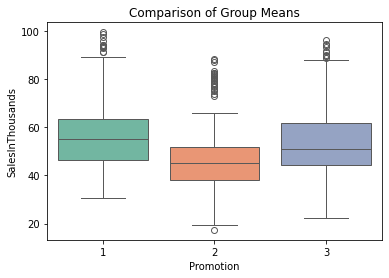

In [33]:
sns.boxplot(x='Promotion', y='SalesInThousands', data=df, palette="Set2")
#sns.color_palette("rocket")
plt.title("Comparison of Group Means")
plt.show()

- Promotion 1 & 3 seem to have higher median sales than Promotion 2.

- Promotion 2 appears to have lower sales and possibly more variation.

Explore Other Variables:
Look at potential confounders or interaction effects (e.g., does promotion performance vary by MarketSize or AgeOfStore?).

### MarketSize

In [36]:
gameshowell_marketsize = pairwise_gameshowell(
    data=df,
    dv='SalesInThousands',   # Dependent variable
    between='MarketSize'      # Grouping variable
)

print("Games-Howell Post-Hoc Results:")
print(gameshowell_marketsize)

Games-Howell Post-Hoc Results:
        A       B    mean(A)    mean(B)       diff        se          T  \
0   Large  Medium  70.116726  43.985344  26.131382  1.409551  18.538804   
1   Large   Small  70.116726  57.409333  12.707393  1.569748   8.095178   
2  Medium   Small  43.985344  57.409333 -13.423990  0.994648 -13.496227   

           df          pval    hedges  
0  217.567539  0.000000e+00  2.104579  
1  224.447350  5.317968e-14  0.841820  
2  105.022509  0.000000e+00 -1.536707  


In [37]:
gameshowell_marketsize_pd = pd.DataFrame(gameshowell_marketsize)
gameshowell_marketsize_pd

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Large,Medium,70.116726,43.985344,26.131382,1.409551,18.538804,217.567539,0.000000e+00,2.104579
1,Large,Small,70.116726,57.409333,12.707393,1.569748,8.095178,224.447350,5.317968e-14,0.841820
2,Medium,Small,43.985344,57.409333,-13.423990,0.994648,-13.496227,105.022509,0.000000e+00,-1.536707


#### Interpretation

- MarketSize Large vs MarketSize Medium 

    - Diff = 26.131
    - T-value = 18.54
    - P-Value = 0 (**Highly Significant**)
    - Hedge's g = 2.104, indicating a very large effect size (the difference between these groups is meaniingful)
    
Sales are significantly different in large markets than medium market.

- MarketSize Large vs MarketSize Small

    - Diff = 12.708
    - T-value = 8.09
    - P-Value = 5.31 - 14 (**Highly Significant**)
    - Hedge's g = 0.84, indicating large effect size (the difference between these groups is meaniingful)
    
Sales are also significantly higher in Large markets than Small markets, but the effect size is smaller compared to the Large vs Medium difference.

- MarketSize Medium vs MarketSize Small

    - Diff = - 13.42
    - T-value = - 13.50
    - P-Value = 0.000 (**Highly Significant**)
    - Hedge's g = 1.54, indicating a very large effect size (the difference between these groups is meaniingful)
    
Surprisingly small markets outperforms medium markets, meaning Medium-sized markets have the lowest sales.


- Large Markets have the highest sales
- Medium Markets perform the worst (fix needed)
- Small Markets do better than Medium (unexpected trend)

/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_50806/69915775.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MarketSize', y='SalesInThousands', data=df, palette="Set2")


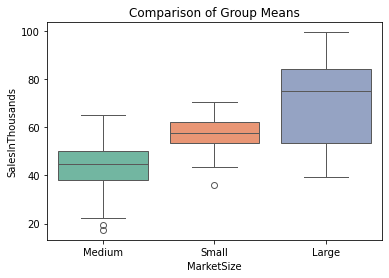

In [38]:
sns.boxplot(x='MarketSize', y='SalesInThousands', data=df, palette="Set2")
#sns.color_palette("rocket")
plt.title("Comparison of Group Means")
plt.show()

/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_50806/521979222.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='MarketSize', y='SalesInThousands', data=df, ci=95, palette="Set2")
/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_50806/521979222.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MarketSize', y='SalesInThousands', data=df, ci=95, palette="Set2")


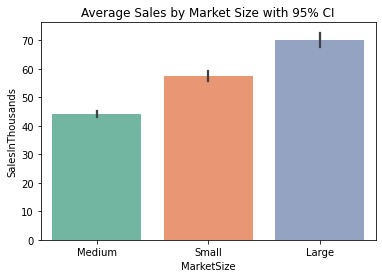

In [40]:
sns.barplot(x='MarketSize', y='SalesInThousands', data=df, ci=95, palette="Set2")
plt.title("Average Sales by Market Size with 95% CI")
plt.show()

### Interaction

In [41]:
model = ols('SalesInThousands ~ C(Promotion) * C(MarketSize)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                                  sum_sq     df           F        PR(>F)
C(Promotion)                12979.270759    2.0   56.241683  6.549744e-23
C(MarketSize)               77803.041539    2.0  337.135582  1.087739e-95
C(Promotion):C(MarketSize)   2116.739627    4.0    4.586120  1.194444e-03
Residual                    62194.324249  539.0         NaN           NaN


In [42]:
anova_results_df = pd.DataFrame(anova_results)
anova_results_df

,sum_sq,df,F,PR(>F)
C(Promotion),12979.270759,2.0,56.241683,6.549744e-23
C(MarketSize),77803.041539,2.0,337.135582,1.087739e-95
C(Promotion):C(MarketSize),2116.739627,4.0,4.586120,1.194444e-03
Residual,62194.324249,539.0,NaN,NaN


- **Promotion:**

> - Sum of Squares: 12979, represents how much sales is explained by promotion.
> - F-statistic: 56.24 (Strong effect), means that how much the promotion is affecting Sales  
> - P-value: 6.55e-23 < 0.05 (Highly significant), we reject the null hypothesis and conclude that promotion type has a significant effect on sales.

- **MarketSize:**

> - Sum of squares: 77803, represents how much sales is explained by promotion.
> - F-Statistic: 337.13 (Strong effect), means that how much the marketsize is affecting sales.
> - P-value: 1.087e-95 < 0.05 (Highly significant), means that we reject the null hypothesis and conclude that market size has the biggest influence on sales.

- **Interaction between promotion and market size on sales:**

> -  Sum of squares: 2116.73, represents how much sales is explained by the combination of promotion and sales.
> - F-Statistic: 4.59 (Moderate effect),means that promortion behave differently across different market. 
> - P-value: 1.194e-03, we reject the null hypothesis, and conclude that the effectiveness of a promotion depends on the market size.

- **Conclusion:**

> - **Market Size** matters the most - the strongest driver of sales is whether the market is **large, medium or small**
> - **Promotions** also matter - some promotion are better at driving sales than others.
> - **Promotions also work differently in each market** - use differemt promotion across different markets

In [49]:
# Games Howell 


gameshowell_results = {}

# Loop through each Market Size and perform Games-Howell for Promotion within that Market Size
for market in df['MarketSize'].unique():
    subset = df[df['MarketSize'] == market]
    result = pairwise_gameshowell(data=subset, dv='SalesInThousands', between='Promotion')
    gameshowell_results[market] = result
    
    
for market, result in gameshowell_results.items():
    print(f"\nGames-Howell Post-Hoc Results for Market Size: {market}")
    print(result)


Games-Howell Post-Hoc Results for Market Size: Medium
   A  B    mean(A)    mean(B)      diff        se         T          df  \
0  1  2  47.672604  39.114352  8.558252  1.181601  7.242931  201.811167   
1  1  3  47.672604  45.468879  2.203725  1.114600  1.977143  202.869349   
2  2  3  39.114352  45.468879 -6.354527  1.132538 -5.610872  216.720338   

           pval    hedges  
0  2.708989e-11  1.006971  
1  1.204847e-01  0.271746  
2  1.829239e-07 -0.749998  

Games-Howell Post-Hoc Results for Market Size: Small
   A  B    mean(A)    mean(B)      diff        se         T         df  \
0  1  2  60.162500  50.810625  9.351875  1.862222  5.021891  30.059016   
1  1  3  60.162500  59.514167  0.648333  1.564168  0.414491  40.813333   
2  2  3  50.810625  59.514167 -8.703542  1.812620 -4.801635  29.585459   

       pval    hedges  
0  0.000063  1.672495  
1  0.909860  0.123050  
2  0.000122 -1.556258  

Games-Howell Post-Hoc Results for Market Size: Large
   A  B    mean(A)    mean(B)  

# Interpretation of Promotion Performance

## Medium Market 

### Promotion 1 vs Promotion 2

- **Difference**: 8.55
- **T-value**: 7.24
- **P-value**: 2.708e-11 (Highly significant, p < 0.05)
- **Hedges' g**: 1.00 (Large effect size)

**Conclusion**:  
- **Promotion 1 significantly outperforms Promotion 2** in Medium markets.  
- The large effect size indicates this difference is meaningful in practice.

### Promotion 1 vs Promotion 3

- **Difference**: 2.203 (Closer performance compared to Promotion 2)
- **T-value**: 1.97
- **P-value**: 1.204e-01 (Not significant, p > 0.05)
- **Hedges' g**: 0.271 (Small effect size)

**Conclusion**:  
- There is **no significant difference** between Promotion 1 and Promotion 3 in Medium markets.  
- The small effect size suggests **similar performance** between the two promotions.

### Promotion 2 vs Promotion 3

- **Difference**: -6.35 (Promotion 2 underperforms compared to Promotion 3)
- **T-value**: -5.61
- **P-value**: 1.829e-07 (Highly significant, p < 0.05)
- **Hedges' g**: -0.74999 (Moderate effect size)

**Conclusion**:  
- **Promotion 2 significantly underperforms compared to Promotion 3** in Medium markets.  
- The moderate effect size indicates that this difference is **practically meaningful**.

---

## Small Market

### Promotion 1 vs Promotion 2

- **Difference**: 9.351
- **T-value**: 5.021
- **P-value**: 0.000063 (Highly significant, p < 0.05)
- **Hedges' g**: 1.67 (Large effect size)

**Conclusion**:  
- **Promotion 1 significantly outperforms Promotion 2** in Small markets.  
- The large effect size indicates this difference is **meaningful in practice**.

### Promotion 1 vs Promotion 3

- **Difference**: 0.648 (Very small difference)
- **T-value**: 0.414 (Minimal difference)
- **P-value**: 0.909 (Not significant, p > 0.05)
- **Hedges' g**: 0.123 (Small effect size)

**Conclusion**:  
- There is **no significant difference** between Promotion 1 and Promotion 3 in Small markets.  
- The small effect size suggests **similar performance** between the two promotions.

### Promotion 2 vs Promotion 3

- **Difference**: -8.7035 (Moderate difference)
- **T-value**: -4.8016 (Significant difference)
- **P-value**: 0.000122 (Highly significant, p < 0.05)
- **Hedges' g**: -1.556 (Large effect size)

**Conclusion**:  
- **Promotion 2 significantly underperforms compared to Promotion 3** in Small markets.  
- The large effect size suggests **Promotion 3 performs significantly better** than Promotion 2.

---

## Large Market

### Promotion 1 vs Promotion 2

- **Difference**: 14.91 (Large difference in mean sales)
- **T-value**: 5.222 (Moderate effect)
- **P-value**: 2.332e-06 (Highly significant, p < 0.05)
- **Hedges' g**: 0.9486 (Large effect size)

**Conclusion**:  
- **Promotion 1 significantly outperforms Promotion 2** in Large markets.  
- The large effect size indicates that this difference is **meaningful in practice**.

### Promotion 1 vs Promotion 3

- **Difference**: -1.968 (Very small difference)
- **T-value**: -0.6707 (Minimal difference)
- **P-value**: 0.781 (Not significant, p > 0.05)
- **Hedges' g**: -0.1302 (Small effect size)

**Conclusion**:  
- There is **no significant difference** between Promotion 1 and Promotion 3 in Large markets.  
- The small effect size suggests **similar performance** between the two promotions.

### Promotion 2 vs Promotion 3

- **Difference**: -16.8819 (Large difference in mean sales)
- **T-value**: -5.2227 (Significant difference)
- **P-value**: 2.332e-06 (Highly significant, p < 0.05)
- **Hedges' g**: -1.1048 (Large effect size)

**Conclusion**:  
- **Promotion 2 significantly underperforms compared to Promotion 3** in Large markets.  
- The large effect size suggests **Promotion 3 outperforms Promotion 2 significantly** in this market.


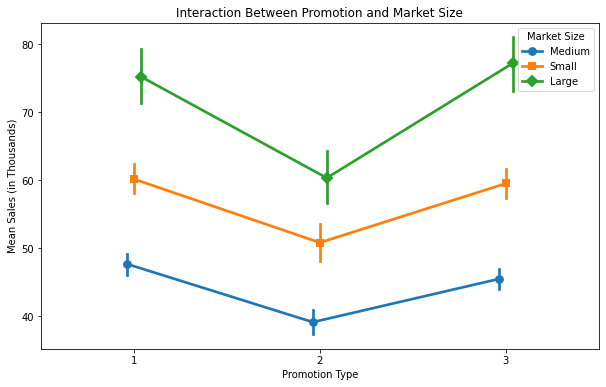

In [48]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Promotion', y='SalesInThousands', hue='MarketSize', data=df, dodge=True, markers=['o', 's', 'D'])
plt.title("Interaction Between Promotion and Market Size")
plt.xlabel("Promotion Type")
plt.ylabel("Mean Sales (in Thousands)")
plt.legend(title="Market Size")
plt.show()

## Conclusion

1. **Promotion 1 is the most consistently high-performing strategy across all markets sizes**, it outperforms promotion 2 in every category. Suggesting that promotion 1 is the best choice to maximize sales.


2. **Promotion 3 performs similarly to promotion 1 in some instances,** except against Promotion 2 as it shows a better performance. in both small and large market there's no clear significance between them. They could be considered a reliable promotion that could generate great sales too.


3. **Promotion 2 consistently underperforms in all market sizes, underperforming behind promotion 1 and promotion 3..** The large effect size suggest that promotion 2 is the least effective at generating sales. 